# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Loading data 

In [3]:
file_path = 'email_campaigns.pkl'
data= pd.read_pickle(file_path)
data

[{'example1': [{'subject': '🚀 Propel Your Marketing ROI with Advanced Analytics!',
    'body': "Hey [Recipient's Name],\n\nReady to see your marketing performance soar? With our cutting-edge Marketing Analytics services, your business can harness the power of data to drive decision-making and skyrocket ROI!\n\nQuick question - are you leveraging your data to its full potential? Let's talk strategy! 👉 [meeting link]\n\nBest,\n[Your Name]",
    'opened': False,
    'meeting link clicked': False,
    'responded': False},
   {'subject': 'Data is Your Superpower 📊 Unlock Insights with Us',
    'body': "Hi [Recipient's Name],\n\nI'm reaching out again because I believe our last message might've slipped through the cracks. With your goals in mind, our marketing analytics can translate your data into actionable strategies that can redefine your marketing's success.\n\nCan we help you harness this superpower? Book a time on my calendar: [meeting link]. Looking forward to connecting!\n\nCheers,\

In [4]:
data_dict = {}
for idx, item in enumerate(data):
    key = f'data{idx + 1}'
    data_dict[key] = item.get('example1', {})
print("data_dict:")

data_dict:


In [5]:
def create_dataframes(data_dict):
    dataframes = {}
    for key, data_list in data_dict.items():
        if data_list:
            dataframes[key] = pd.DataFrame(data_list)
    return dataframes
dataframes = create_dataframes(data_dict)
for key, df in dataframes.items():
    print(f"{key}:")
    print(df)
    print("\n")

data1:
                                             subject  \
0  🚀 Propel Your Marketing ROI with Advanced Anal...   
1  Data is Your Superpower 📊 Unlock Insights with Us   
2  Turn Marketing Data Into Decisions 🧐 Let's Exp...   
3  Marketing Success is a Click Away - Let's Chat...   

                                                body  opened  \
0  Hey [Recipient's Name],\n\nReady to see your m...   False   
1  Hi [Recipient's Name],\n\nI'm reaching out aga...    True   
2  Greetings [Recipient's Name],\n\nWe haven't co...   False   
3  Hello [Recipient's Name],\n\nIt's clear that y...    True   

   meeting link clicked  responded  
0                 False      False  
1                 False      False  
2                 False      False  
3                  True      False  


data2:
                                             subject  \
0  🚀 Boost Your Brand's Visibility with Proven Ma...   
1  Turn Data into Decisions 📊 - Your Next Competi...   
2  Last Call: Your Blueprint 

In [6]:
def create_dataframes(data_dict):
    dataframes = {}
    for key, data_list in data_dict.items():
        if data_list:
            dataframes[key] = pd.DataFrame(data_list)
    return dataframes
dataframes = create_dataframes(data_dict)
all_data = pd.concat(dataframes.values(), ignore_index=True)
print(all_data)

                                              subject  \
0   🚀 Propel Your Marketing ROI with Advanced Anal...   
1   Data is Your Superpower 📊 Unlock Insights with Us   
2   Turn Marketing Data Into Decisions 🧐 Let's Exp...   
3   Marketing Success is a Click Away - Let's Chat...   
4   🚀 Boost Your Brand's Visibility with Proven Ma...   
..                                                ...   
76       Can We Help Enhance Your Marketing Strategy?   
77                      Boost Your Brand Visibility 🚀   
78    🔍 Outpace Competitors with Insightful Analytics   
79                         Tailored Analytics for You   
80          Let's Make Data-Driven Decisions Together   

                                                 body  opened  \
0   Hey [Recipient's Name],\n\nReady to see your m...       0   
1   Hi [Recipient's Name],\n\nI'm reaching out aga...       1   
2   Greetings [Recipient's Name],\n\nWe haven't co...       0   
3   Hello [Recipient's Name],\n\nIt's clear that y...  

In [7]:
all_data.head(10)

,subject,body,opened,meeting link clicked,responded,meeting_link_clicked
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",0,False,0,NaN
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",1,False,0,NaN
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",0,False,0,NaN
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",1,True,0,NaN
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",0,False,0,NaN
5,Turn Data into Decisions 📊 - Your Next Competi...,"Hey [Recipient's Name],\n\nI saw that my previ...",1,False,0,NaN
6,Last Call: Your Blueprint for Marketing Succes...,"Hello [Recipient's Name],\n\nI hope this messa...",0,False,0,NaN
7,"We’re Confident in our Data, Here’s Why You Sh...","Greetings [Recipient's Name],\n\nYour success ...",1,True,0,NaN
8,🚀Boost Your ROI with Precision Marketing Analy...,"Hi [Recipient's Name],\n\nDo you want to see a...",0,False,0,NaN
9,Your Marketing Strategy Deserves the Best Anal...,"Hello [Recipient's Name],\n\nImprove your mark...",1,False,0,NaN


In [8]:
all_values = all_data
all_values = all_values.drop('meeting_link_clicked', axis=1, errors='ignore')
print(all_values)

                                              subject  \
0   🚀 Propel Your Marketing ROI with Advanced Anal...   
1   Data is Your Superpower 📊 Unlock Insights with Us   
2   Turn Marketing Data Into Decisions 🧐 Let's Exp...   
3   Marketing Success is a Click Away - Let's Chat...   
4   🚀 Boost Your Brand's Visibility with Proven Ma...   
..                                                ...   
76       Can We Help Enhance Your Marketing Strategy?   
77                      Boost Your Brand Visibility 🚀   
78    🔍 Outpace Competitors with Insightful Analytics   
79                         Tailored Analytics for You   
80          Let's Make Data-Driven Decisions Together   

                                                 body  opened  \
0   Hey [Recipient's Name],\n\nReady to see your m...       0   
1   Hi [Recipient's Name],\n\nI'm reaching out aga...       1   
2   Greetings [Recipient's Name],\n\nWe haven't co...       0   
3   Hello [Recipient's Name],\n\nIt's clear that y...  

In [9]:
all_values.head(10)

,subject,body,opened,meeting link clicked,responded
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",0,False,0
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",1,False,0
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",0,False,0
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",1,True,0
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",0,False,0
5,Turn Data into Decisions 📊 - Your Next Competi...,"Hey [Recipient's Name],\n\nI saw that my previ...",1,False,0
6,Last Call: Your Blueprint for Marketing Succes...,"Hello [Recipient's Name],\n\nI hope this messa...",0,False,0
7,"We’re Confident in our Data, Here’s Why You Sh...","Greetings [Recipient's Name],\n\nYour success ...",1,True,0
8,🚀Boost Your ROI with Precision Marketing Analy...,"Hi [Recipient's Name],\n\nDo you want to see a...",0,False,0
9,Your Marketing Strategy Deserves the Best Anal...,"Hello [Recipient's Name],\n\nImprove your mark...",1,False,0


# Visualisation and Exploratory Data Analysis

In [10]:
print(all_values.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               81 non-null     object
 1   body                  81 non-null     object
 2   opened                81 non-null     int64 
 3   meeting link clicked  75 non-null     object
 4   responded             81 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.3+ KB
None


# Statistical Summary

In [11]:
print(all_values.describe())

          opened  responded
count  81.000000  81.000000
mean    0.740741   0.049383
std     0.440959   0.218016
min     0.000000   0.000000
25%     0.000000   0.000000
50%     1.000000   0.000000
75%     1.000000   0.000000
max     1.000000   1.000000


In [12]:
print(all_values.nunique())

subject                 81
body                    81
opened                   2
meeting link clicked     2
responded                2
dtype: int64


# Open Rates Visualisation

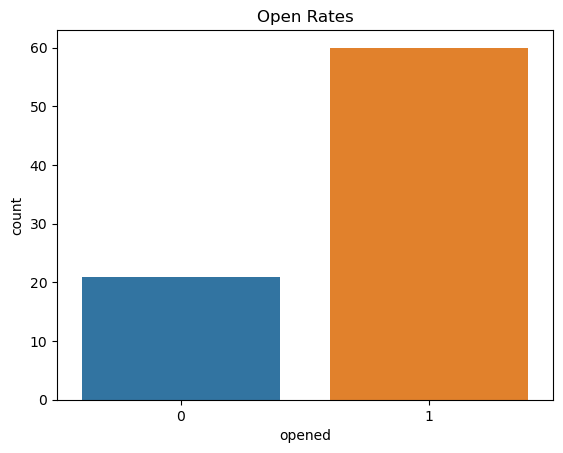

In [13]:
sns.countplot(x='opened', data=all_values)
plt.title('Open Rates')
plt.show()

# Click through rate visualisation

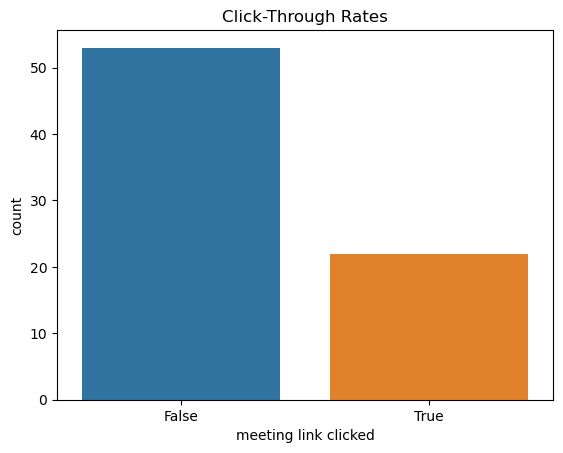

In [14]:
sns.countplot(x='meeting link clicked', data=all_values)
plt.title('Click-Through Rates')
plt.show()

# Conversion rate visualisation

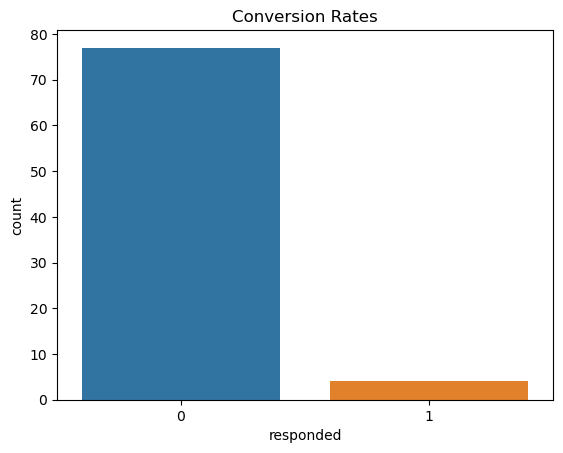

In [15]:
sns.countplot(x='responded', data=all_values)
plt.title('Conversion Rates')
plt.show()

# Cross-tabulation of open rate and conversion

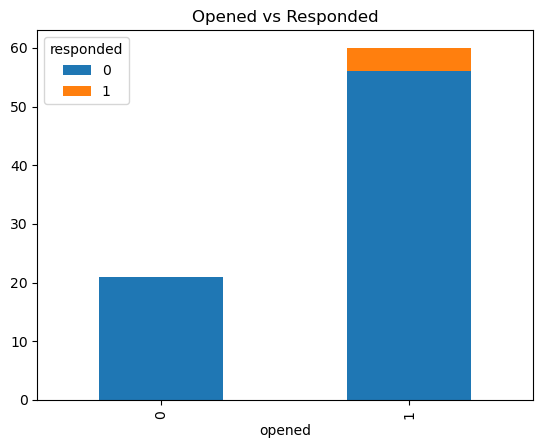

In [16]:
pd.crosstab(all_values['opened'], all_values['responded']).plot(kind='bar', stacked=True)
plt.title('Opened vs Responded')
plt.show()

# Correlation heatmap visualisation

C:\Users\kriti\AppData\Local\Temp\ipykernel_18740\3266844200.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = all_values.corr()


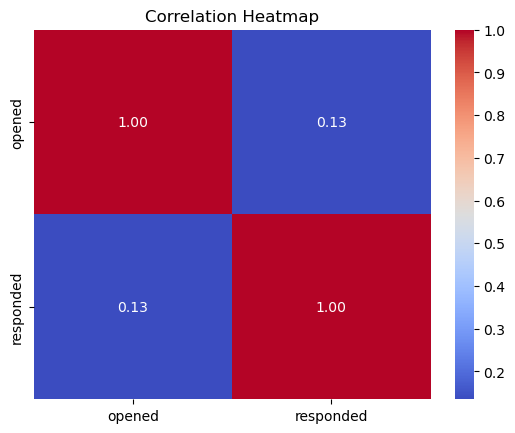

In [17]:
correlation_matrix = all_values.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data PreProcessing

In [18]:
# Missing Values
missing_values = all_values.isnull().sum()
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])
print("\nSummary Statistics for Missing Values:")
print(all_values.isnull().sum().describe())
print("\nPercentage of Missing Values in Each Column:")
print((all_values.isnull().sum() / len(all_values)) * 100)

Columns with Missing Values:
meeting link clicked    6
dtype: int64

Summary Statistics for Missing Values:
count    5.000000
mean     1.200000
std      2.683282
min      0.000000
25%      0.000000
50%      0.000000
75%      0.000000
max      6.000000
dtype: float64

Percentage of Missing Values in Each Column:
subject                 0.000000
body                    0.000000
opened                  0.000000
meeting link clicked    7.407407
responded               0.000000
dtype: float64


In [19]:
all_values = all_values.dropna()

In [20]:
all_values['body_length'] = all_values['body'].apply(lambda x: len(x))
all_values['has_recipient_name'] = all_values['body'].apply(lambda x: 1 if '[Recipient\'s Name]' in x else 0)
all_values = all_values.drop(['subject', 'body'], axis=1)

# Model Development

In [21]:
X = all_values.drop(['opened', 'meeting link clicked', 'responded'], axis=1)
y = all_values['opened']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Initialization and Training

In [23]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# Model Prediction

In [24]:
y_pred = model.predict(X_test_scaled)

# Model Evaluation

Accuracy: 0.60

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.69      0.82      0.75        11

    accuracy                           0.60        15
   macro avg       0.35      0.41      0.38        15
weighted avg       0.51      0.60      0.55        15


Confusion Matrix:
 [[0 4]
 [2 9]]


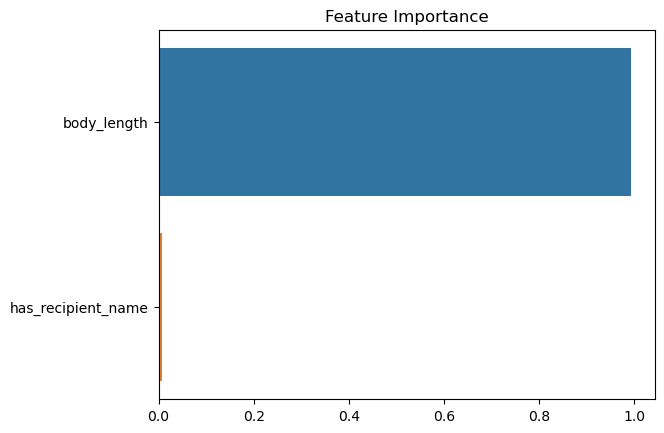

In [25]:
# Accuracy, Classification Report, and Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
feature_importance = model.feature_importances_
feature_names = X.columns
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.show()

# Hyperparameter Tuning

In [26]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.6833333333333333
Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.73      1.00      0.85        11

    accuracy                           0.73        15
   macro avg       0.37      0.50      0.42        15
weighted avg       0.54      0.73      0.62        15


Confusion Matrix:
 [[ 0  4]
 [ 0 11]]


C:\Users\kriti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kriti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kriti\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Ensemble Model

In [ ]:
file_path = 'email_campaigns.pkl'
data= pd.read_pickle(file_path)
data_dict = {}
for idx, item in enumerate(data):
    key = f'data{idx + 1}'
    data_dict[key] = item.get('example1', {})
print("data_dict:")
print(data_dict)
def create_dataframes(data_dict):
    dataframes = {}
    for key, data_list in data_dict.items():
        if data_list:
            dataframes[key] = pd.DataFrame(data_list)
    return dataframes
dataframes = create_dataframes(data_dict)
for key, df in dataframes.items():
    print(f"{key}:")
    print(df)
    print("\n")
def create_dataframes(data_dict):
    dataframes = {}
    for key, data_list in data_dict.items():
        if data_list:
            dataframes[key] = pd.DataFrame(data_list)
    return dataframes
dataframes = create_dataframes(data_dict)
all_data = pd.concat(dataframes.values(), ignore_index=True)
print(all_data)
all_values = all_data
all_values = all_values.drop('meeting_link_clicked', axis=1, errors='ignore')
print(all_values)
all_values.head(10)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
all_values['body_length'] = all_values['body'].apply(lambda x: len(x))
all_values['has_recipient_name'] = all_values['body'].apply(lambda x: 1 if '[Recipient\'s Name]' in x else 0)
all_values = all_values.drop(['subject', 'body'], axis=1)
X = all_values.drop(['opened', 'meeting link clicked', 'responded'], axis=1)
y = all_values['opened']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model), ('svm', svm_model)],
    voting='hard'
)
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly']
}
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print('Best Parameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)
best_ensemble_model = grid_search.best_estimator_
y_pred_ensemble = best_ensemble_model.predict(X_test_scaled)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f'Ensemble Model Accuracy: {accuracy_ensemble:.2f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred_ensemble))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred_ensemble))